In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [67]:
df=pd.read_csv('global_air_pollution_data.csv')

In [68]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [69]:
df.shape

(23463, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [71]:
(df.duplicated().sum() / len(df)) * 100

0.0

In [72]:
#sum of null values in this columns
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

## 1. Feature Analysis

Country_name: Name of the Country

In [73]:
df.country_name.isna().sum()/len(df) * 100

1.8198866300132122

In [74]:
df.country_name.value_counts(normalize=True)

country_name
United States of America    0.124674
India                       0.108005
Brazil                      0.067807
Germany                     0.058387
Russian Federation          0.053872
                              ...   
Vanuatu                     0.000043
Solomon Islands             0.000043
Republic of Korea           0.000043
Saint Lucia                 0.000043
Monaco                      0.000043
Name: proportion, Length: 175, dtype: float64

_observation_:
- Feature contains null values.
- Feature contains categorical values.

city_name: Name of the City

In [75]:
df.city_name.isna().sum()/len(df) * 100

0.004262029578485275

In [76]:
df.city_name.value_counts(normalize=True)

city_name
Praskoveya        0.000043
Dinklage          0.000043
Dera Din Panah    0.000043
De Pere           0.000043
Damghan           0.000043
                    ...   
Vinces            0.000043
Vila              0.000043
Ciudad Valles     0.000043
Citeureup         0.000043
Marang            0.000043
Name: proportion, Length: 23462, dtype: float64

_observation_:
- Feature contains null values.
- Feature contains categorical values.

aqi_value: Overall AQI value of the city

In [77]:
df.aqi_value.isna().sum()/len(df) * 100

0.0

In [78]:
df.aqi_value.value_counts(normalize=True)

aqi_value
50     0.020586
35     0.020159
34     0.019009
39     0.018455
36     0.018199
         ...   
256    0.000043
405    0.000043
236    0.000043
376    0.000043
253    0.000043
Name: proportion, Length: 347, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains numerical values.


aqi_category: Overall AQI category of the city

In [79]:
df.aqi_category.isna().sum()/len(df) * 100

0.0

In [80]:
df.aqi_category.value_counts(normalize=True)

aqi_category
Good                              0.423475
Moderate                          0.393428
Unhealthy                         0.094915
Unhealthy for Sensitive Groups    0.067809
Very Unhealthy                    0.012232
Hazardous                         0.008140
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains categorical values.

co_aqi_value\t:  AQI value of Carbon Monoxide of the city

In [81]:
df['co_aqi_value\t'].isna().sum()/len(df) * 100

0.0

In [82]:
df['co_aqi_value\t'].value_counts(normalize=True)

co_aqi_value\t
1      0.633636
0      0.132549
2      0.128372
3      0.051357
4      0.027959
5      0.009973
6      0.004816
7      0.002813
9      0.001662
8      0.001620
10     0.001279
11     0.000682
12     0.000682
15     0.000469
13     0.000426
16     0.000341
14     0.000213
21     0.000170
19     0.000128
23     0.000085
22     0.000085
20     0.000085
28     0.000085
18     0.000085
41     0.000043
36     0.000043
49     0.000043
35     0.000043
27     0.000043
51     0.000043
67     0.000043
133    0.000043
31     0.000043
17     0.000043
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains numerical values.

co_aqi_category: AQI category of Carbon Monoxide of the city


In [83]:
df['co_aqi_category'].isna().sum()/len(df) * 100

0.0

In [84]:
df['co_aqi_category'].value_counts(normalize=True)

co_aqi_category
Good                              0.999872
Moderate                          0.000085
Unhealthy for Sensitive Groups    0.000043
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains categorical values.

ozone_aqi_value: 

In [85]:
df['ozone_aqi_value'].isna().sum()/len(df) * 100

0.0

In [86]:
df['ozone_aqi_value'].value_counts(normalize=True)

ozone_aqi_value
30     0.030388
32     0.029152
29     0.028598
28     0.028300
33     0.028257
         ...   
199    0.000043
189    0.000043
222    0.000043
235    0.000043
214    0.000043
Name: proportion, Length: 213, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains numerical values.

ozone_aqi_category: AQI value of Ozone of the city


In [87]:
df['ozone_aqi_category'].isna().sum()/len(df) * 100

0.0

In [88]:
df['ozone_aqi_category'].value_counts(normalize=True)

ozone_aqi_category
Good                              0.897967
Moderate                          0.061586
Unhealthy for Sensitive Groups    0.020927
Unhealthy                         0.017261
Very Unhealthy                    0.002259
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains categorical values.

no2_aqi_value: AQI value of Nitrogen Dioxide of the city


In [89]:
df['no2_aqi_value'].isna().sum()/len(df) * 100

0.0

In [90]:
df['no2_aqi_value'].value_counts(normalize=True)

no2_aqi_value
0     0.351276
1     0.198824
2     0.115714
3     0.080638
4     0.053915
5     0.037591
6     0.028342
7     0.020543
8     0.017261
9     0.012701
10    0.011550
11    0.009504
12    0.007842
13    0.007331
15    0.005114
14    0.005029
18    0.004305
16    0.003751
19    0.003623
17    0.003367
20    0.002856
22    0.002088
21    0.002046
23    0.001875
25    0.001364
24    0.001279
26    0.001193
27    0.001023
30    0.000980
28    0.000938
31    0.000767
29    0.000725
34    0.000639
33    0.000597
36    0.000511
35    0.000426
39    0.000341
37    0.000256
47    0.000170
41    0.000170
32    0.000170
48    0.000128
59    0.000128
44    0.000128
51    0.000128
46    0.000128
40    0.000085
52    0.000085
38    0.000085
49    0.000085
91    0.000043
64    0.000043
58    0.000043
63    0.000043
53    0.000043
61    0.000043
42    0.000043
69    0.000043
43    0.000043
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains numerical values.

no2_aqi_category: AQI category of Nitrogen Dioxide of the city


In [91]:
df['no2_aqi_category'].isna().sum()/len(df) * 100

0.0

In [92]:
df['no2_aqi_category'].value_counts(normalize=True)

no2_aqi_category
Good        0.999361
Moderate    0.000639
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains categorical values.

pm2.5_aqi_value:  AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city


In [93]:
df['pm2.5_aqi_value'].isna().sum()/len(df) * 100

0.0

In [94]:
df['pm2.5_aqi_value'].value_counts(normalize=True)

pm2.5_aqi_value
50     0.020586
54     0.018199
52     0.017645
51     0.017517
53     0.016025
         ...   
370    0.000043
256    0.000043
441    0.000043
353    0.000043
253    0.000043
Name: proportion, Length: 383, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains numerical values.

pm2.5_aqi_category:AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


In [95]:
df['pm2.5_aqi_category'].value_counts(normalize=True)

pm2.5_aqi_category
Good                              0.435068
Moderate                          0.386779
Unhealthy                         0.090739
Unhealthy for Sensitive Groups    0.069215
Very Unhealthy                    0.010868
Hazardous                         0.007331
Name: proportion, dtype: float64

_observation_:
- Feature does not contain null values.
- Feature contains categorical values.

## 2. Data Preprocessing

2.1 Removing null values

In [96]:
df.dropna(inplace=True)

In [97]:
df.isna().sum()

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

2.2 Changing some columns names


In [98]:
df.rename(columns={'co_aqi_value\t': 'co_aqi_value'}, inplace=True)
df.rename(columns={'pm2.5_aqi_value': 'pm25_aqi_value'}, inplace=True)
df.rename(columns={'pm2.5_aqi_category': 'pm25_aqi_category'}, inplace=True)

In [99]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm25_aqi_value', 'pm25_aqi_category'],
      dtype='object')

2.3 Changing the data type of the columns

In [100]:
df['aqi_value'] = df['aqi_value'].astype(int)
df['co_aqi_value'] = df['co_aqi_value'].astype(int)
df['ozone_aqi_value'] = df['ozone_aqi_value'].astype(int)
df['no2_aqi_value'] = df['no2_aqi_value'].astype(int)
df['pm25_aqi_value'] = df['pm25_aqi_value'].astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23035 non-null  object
 1   city_name           23035 non-null  object
 2   aqi_value           23035 non-null  int32 
 3   aqi_category        23035 non-null  object
 4   co_aqi_value        23035 non-null  int32 
 5   co_aqi_category     23035 non-null  object
 6   ozone_aqi_value     23035 non-null  int32 
 7   ozone_aqi_category  23035 non-null  object
 8   no2_aqi_value       23035 non-null  int32 
 9   no2_aqi_category    23035 non-null  object
 10  pm25_aqi_value      23035 non-null  int32 
 11  pm25_aqi_category   23035 non-null  object
dtypes: int32(5), object(7)
memory usage: 1.8+ MB


2.4 GAQI value

In [102]:
df['GAQI'] = df[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm25_aqi_value']].max(axis=1)

In [103]:
df.loc[df['GAQI'] <= 50, 'GAQI_CATEGORY'] = 'Good'
df.loc[(df['GAQI'] > 50) & (df['GAQI'] <= 100), 'GAQI_CATEGORY'] = 'MODERATE'
df.loc[(df['GAQI'] > 100) & (df['GAQI'] <= 150), 'GAQI_CATEGORY'] = 'Unhealthy for Sensitive Groups'
df.loc[(df['GAQI'] > 150) & (df['GAQI'] <= 200), 'GAQI_CATEGORY'] = 'Unhealthy'
df.loc[(df['GAQI'] > 200) & (df['GAQI'] <= 300), 'GAQI_CATEGORY'] = 'Very Unhealthy'
df.loc[df['GAQI'] > 300, 'GAQI_CATEGORY'] = 'Hazardous'

2.5 correlation matrix

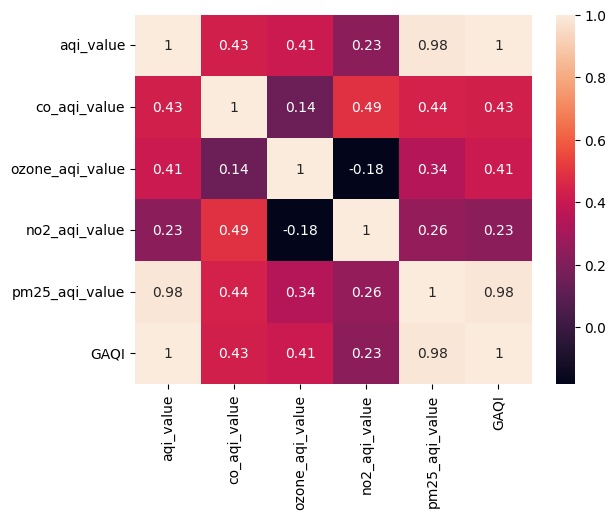

In [104]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True)
plt.show()

_observation_:
- There is a strong correlation between the features GAQI value and AQI value.

dropping AQI value column

In [105]:
df.drop('aqi_value', axis=1, inplace=True)


In [106]:
df.drop('aqi_category', axis=1, inplace=True)

2.6 Checking for outliers

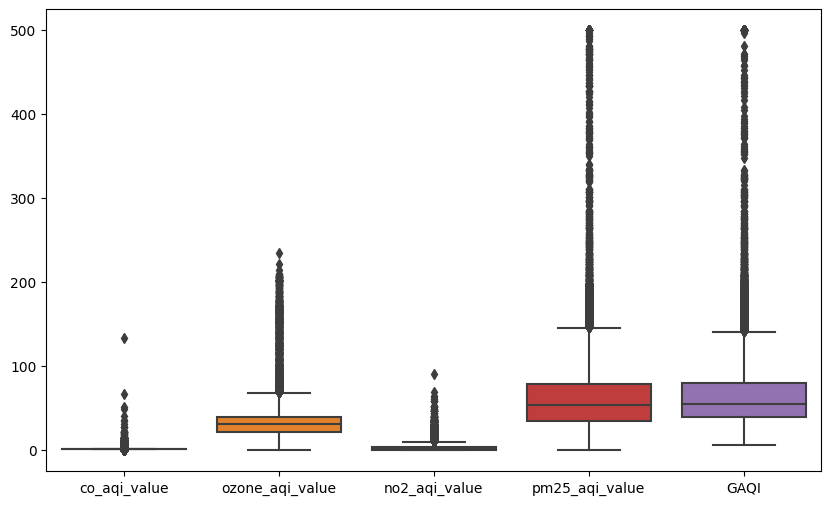

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

2.7 Removing outliers

In [108]:
df = df[df['co_aqi_value'] <= 100]


In [109]:
df=df[df['no2_aqi_value'] <= 90]

## 3. Feature Engineering

#### 3.1 Constant Variables

In [110]:
vs_constant = VarianceThreshold(threshold=0)
numerical = df[df.select_dtypes([np.number]).columns]
vs_constant.fit(numerical)

VarianceThreshold(threshold=0)

In [111]:
constant_columns = [column for column in numerical.columns
                    if column not in numerical.columns[vs_constant.get_support()]]

In [112]:
constant_cat_columns = [column for column in df.columns 
                        if (df[column].dtype == "O" and len(df[column].unique())  == 1 )]

In [113]:
all_constant_columns = constant_cat_columns + constant_columns
all_constant_columns

[]

_observation_:

- There are no constant variables in the dataset.

## 3.2 Quasi Constant

In [114]:
threshold = 0.98
quasi_constant_feature = []

In [115]:
for feature in df.columns:
    predominant = (df[feature].value_counts() / float(len(df))).sort_values(ascending=False).values[0]
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

['co_aqi_category', 'no2_aqi_category']


_observation_:

- There are no quasi-constant variables in the dataset.



## 3.3 Dropping quasi constant variables

In [116]:
df.drop('co_aqi_category', axis=1, inplace=True)
df.drop('no2_aqi_category', axis=1, inplace=True)

# 3.4 Encoding

In [117]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [118]:
df.head()

,country_name,city_name,co_aqi_value,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,pm25_aqi_value,pm25_aqi_category,GAQI,GAQI_CATEGORY,country_name_encoded,city_name_encoded,ozone_aqi_category_encoded,pm25_aqi_category_encoded,GAQI_CATEGORY_encoded
0,Russian Federation,Praskoveya,1,36,Good,0,51,Moderate,51,MODERATE,129,16219,0,2,2
1,Brazil,Presidente Dutra,1,5,Good,1,41,Good,41,Good,22,16239,0,0,0
2,Italy,Priolo Gargallo,1,39,Good,2,66,Moderate,66,MODERATE,75,16273,0,2,2
3,Poland,Przasnysz,1,34,Good,0,20,Good,34,Good,123,16307,0,0,0
4,France,Punaauia,0,22,Good,0,6,Good,22,Good,54,16381,0,0,0


## 5.5 Splitting data

In [119]:

X = df.drop('GAQI', axis=1)
y = df['GAQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
X_train.shape, X_test.shape

((18426, 14), (4607, 14))

## 5.6 Feature selection

In [121]:
categorical_columns = ['country_name', 'city_name', 'ozone_aqi_category', 'pm25_aqi_category', 'GAQI_CATEGORY']
X_train = X_train.drop(categorical_columns, axis=1)


In [122]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

9

In [123]:
X_train_T = X_train.T
print(X_train_T.duplicated().sum())
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


<Axes: title={'center': 'Pearson Correlation of Features'}>

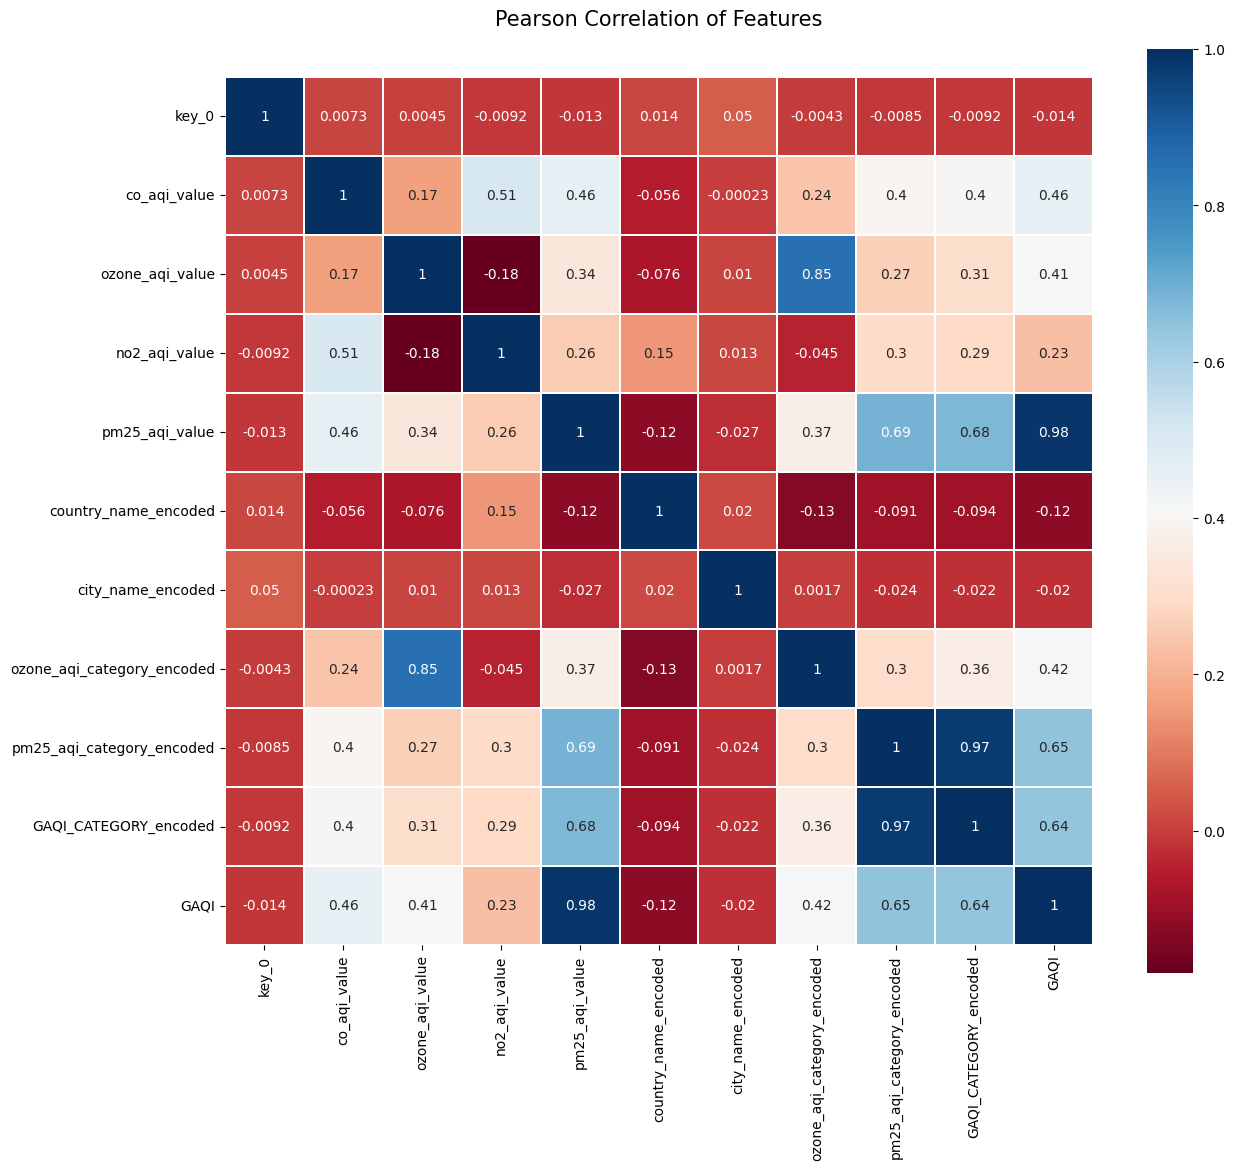

In [124]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

_observation_:

- No highly correlated features in the dataset.

In [125]:

selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)


ExtraTreesRegressor()

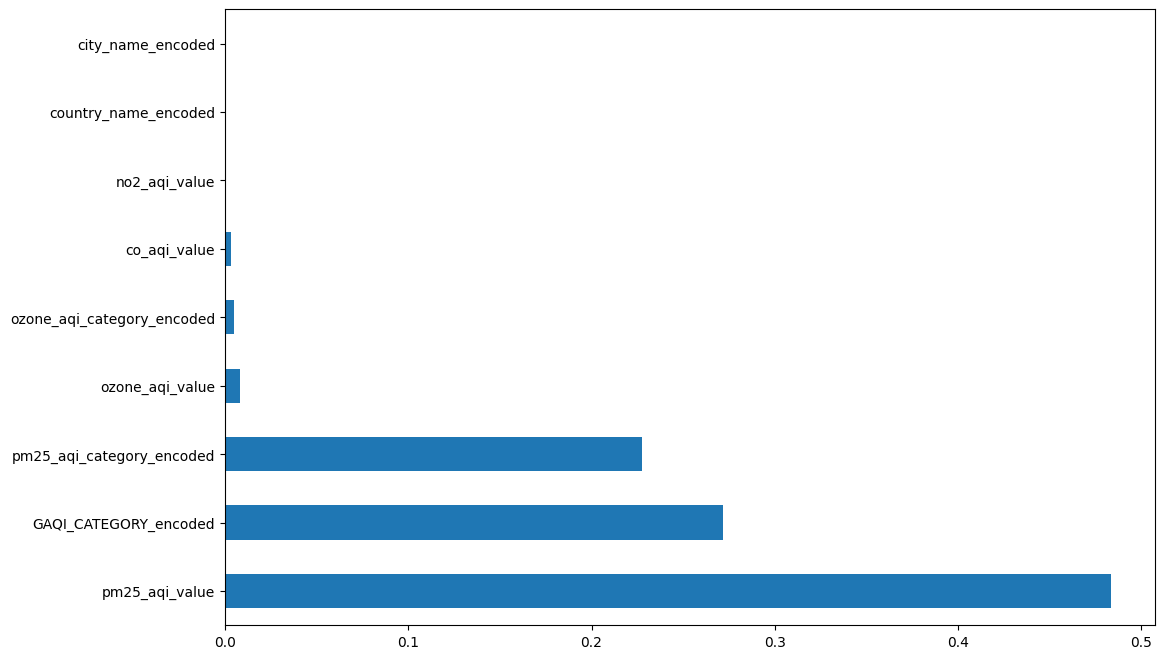

In [126]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## 4.Modelling

## 4.1 Linear Regression

In [127]:
categorical_columns = ['country_name', 'city_name', 'ozone_aqi_category', 'pm25_aqi_category', 'GAQI_CATEGORY']
X_test = X_test.drop(categorical_columns, axis=1)

In [128]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [129]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.8396048461670995
MSE: 68.9137899901416
RMSE: 8.301433008230664


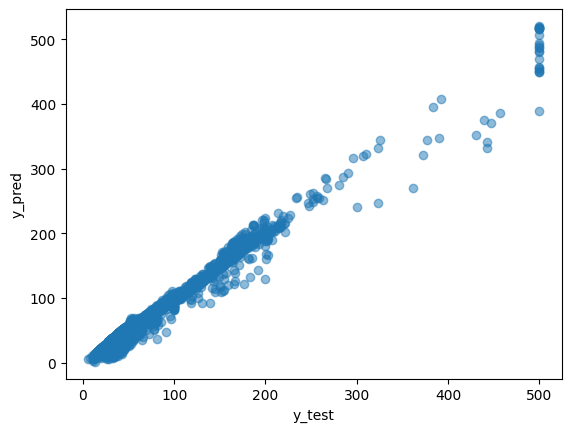

In [130]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4.2 Decision Tree

In [131]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9657043629259822


In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.46038636856956805
MSE: 23.260907314955503
RMSE: 4.82295628374916


## 4.3 Random Forest

In [133]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8194052528760581


In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9092685044497504
MSE: 19.386802691556326
RMSE: 4.403044706967705
